<a href="https://colab.research.google.com/github/Narendraiitg/Different_Kernels_SVM/blob/main/Different_Kernels_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing the various libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
# Creating the first data set using circle equation
x = np.linspace(-5.0, 5.0, 100) # Creating the 100 nos of eqaully spaced points between -5 to 5
y = np.sqrt(10**2 - x**2) # Calculating the y using eqaution of circle (y=sqrt(r**2-x**2)) having the radius 10 units
y=np.hstack([y,-y]) # Staking the sequence of values of y horizontally
x=np.hstack([x,-x]) # Staking the sequence of values of x horizontally

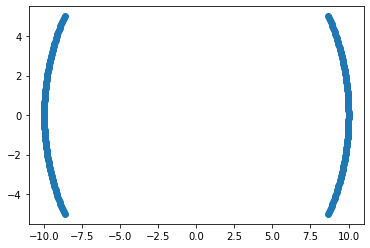

In [6]:
# Checking the scattered plot of y VS x
plt.scatter(y,x)

In [4]:
# Creating the data set using circle equation
x1 = np.linspace(-5.0, 5.0, 100) # Creating the 100 nos of eqaully spaced points between -5 to 5
y1 = np.sqrt(5**2 - x1**2)  # Calculating the y1 using eqaution of circle (y1=sqrt(r**2-x1**2)) having the radius 5 units
y1=np.hstack([y1,-y1])  # Staking the sequence of values of y1 horizontally
x1=np.hstack([x1,-x1]) # Staking the sequence of values of x1 horizontally

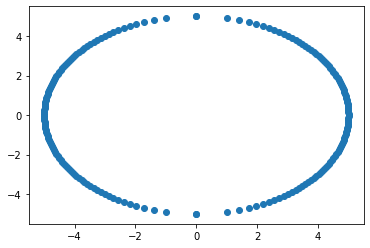

In [7]:
# Checking the scattered plot of y1 VS x1
plt.scatter(y1,x1)

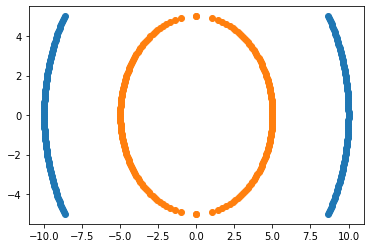

In [8]:
# Creating the combined plot of both y,x & y1,x1
plt.scatter(y,x) 
plt.scatter(y1,x1)

From above figure if we can observe that the blue circle is of radius 10 units and the orange circle is of radius 5 units and we can not easily seperate the blue points and the orange points by using linear/staright line but still lets try to seperate using linear and check the accuracy of the model.

In [12]:
# Creating two data frames
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2']) # Dataframe with respect to y,x
df1['Y']=0 # for first Dataframe lets fix the output feature as 0 ie y is a function of x1 & x2
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2']) # Dataframe with respect to y1,x1
df2['Y']=1 # for second Dataframe lets fix the output feature as 1 ie y is the function of x1 and x2
df = df1.append(df2) # Appending the new dataframe in old one
df.head(5) # checking the first 5 rows of the data frames

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [13]:
# Deviding the features into dependent y and independent x1 & x2
X = df.iloc[:, :2]  
y = df.Y

In [14]:
# Spliting the data into tarining and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0) # Assuming test set as 25 % of toatl data

In [15]:
len(y)

400

In [18]:
len(y_train)


300

Length of training data is 300 is the 75 % of total data (ie 400) which means out of 400 samples of data we use 300 to train our model and 100  to test/evaluate our model

**1) Applying linear kernel**

In [31]:
# Classifying the data points using linear kernel
classifier=SVC(kernel="linear")
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [32]:
y_pred = classifier.predict(X_test) # Predicting the y value for the linear kernel
accuracy_score(y_test, y_pred) #Calculating the accuracy of the model in case of linear model

0.45

So the accuracy we can see is less than 50 % (45%) if we try to sperate the two concentric type data points using linear kernel(Straight line)

**2) Applying rbf/ guassion kernel**

In [27]:
classifier=SVC(kernel="rbf") # Applying the rbf/gaussion kernel
classifier.fit(X_train,y_train) # Fitting the model

SVC()

In [28]:
y_pred = classifier.predict(X_test) # Predicting the y value for the rbf/gaussion kernel
accuracy_score(y_test, y_pred) # Calculating the accuracy of the model in case of rbf kernel

1.0

So from above we can see by applying nonlinear kernel ie rbf/gaussion the accuracy of our model reached to 100 %

**3) Applying Sigmoid kernel**

In [33]:
classifier=SVC(kernel="sigmoid") # Applying the sigmoid kernel
classifier.fit(X_train,y_train) # Fitting the model

SVC(kernel='sigmoid')

In [34]:
y_pred = classifier.predict(X_test) # Predicting the y value for the sigmoid kernel
accuracy_score(y_test, y_pred) # Calculating the accuracy of the model in case of sigmoid kernel

0.51

So from above we can see by applying another nonlinear kernel ie sigmoid the accuracy of our model is 51 % which is greater than that of linear and less than that of rbf case

**4) Applying Polynomial kernel**

Polynomial Kernel formula is given by

K(x,y) = (x^T*y +C)^d
 
where d is the degree of polynomial

In [35]:
# We have to find parameters for the Polynomical Kernel ie X1_square,X2_square & X1*X2 using X1 , X2
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [36]:
# Deviding the features into dependent y and independent X1,X2,X1_square,X2_square & X1*X2
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [37]:
# Spliting the data into tarining and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0) # Assuming test set as 25 % of toatl data

In [38]:
# Checking the 3D curve of X1, X2 & X1X2
import plotly.express as px

fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',
              color='Y')
fig.show()

From figure we can see that the data points are very much imerged into each other and can never be seperable using the linear plane

In [40]:
# Checking the 3D curve of X1_square,X2_square & X1*X2
fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2',
              color='Y')
fig.show()

Above figure is easyly seperable using the linear hyper plane

In [41]:
classifier=SVC(kernel="poly") # Applying the polynomial kernel
classifier.fit(X_train,y_train) # Fitting the model

SVC(kernel='poly')

In [42]:
y_pred = classifier.predict(X_test) # Predicting the y value for the polynomial kernel
accuracy_score(y_test, y_pred) # Calculating the accuracy of the model in case of polynomial kernel

1.0

So from above we can see by applying nonlinear polynomial kernel the accuracy of our model reached to 100 %

**Comparison of Kernel Performance** If we compare the performance of the different types of kernels we can clearly see that if our data points are nonlinearly distributed then linear kernel will give less accurate prediction on the other hand all the non linear kernels may gave the same/different results but will give more accurate than linear

So from the observations we can say that there is no hard and fast rule as to which kernel performs best in every scenario. It is all about testing all the kernels and selecting the one with the best results on the test dataset.